# This notebook contains steps and Clustering Model for Customer Churn data: Using KMeans Algorithm and Silhouette Method

In [1]:
import numpy as np              # efficient numerical computations
import pandas as pd             # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization

from sklearn.cluster import KMeans           # KMeans algorithm for clustering
from sklearn.preprocessing import StandardScaler # scaling data to have zero mean and unit variance
from sklearn.preprocessing import LabelEncoder   # encoding categorical features as integers
from sklearn.metrics import silhouette_score     # evaluating quality of clusters based on cohesion and separation


In [2]:
# set the display options
pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.max_rows', None)      # show all rows
pd.set_option('display.width', None)         # auto-adjust column width

data_TC=pd.read_csv("D:\Portfolio-dashboards\Customer_Churn_project\Customer_churn_Python\Telco-Customer-Churn.csv")

In [3]:
data_TC.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing

In [4]:
data_TC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#coverting "TotalCharges" to numerical 
data_TC['TotalCharges'] = pd.to_numeric(data_TC['TotalCharges'], errors='coerce')
print(data_TC.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [6]:
# check which columns have NaNs
nan_cols = data_TC.isna().any()
nan_cols

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [7]:
#replacing na values for "TotalCharges" column
data_TC['TotalCharges'].fillna(data_TC['MonthlyCharges'], inplace=True)

In [8]:
data_TC.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [9]:
# now data is clean and ready for clustering
data_TC.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## K-means clustring 
#This code converts categorical data in a pandas DataFrame to numerical values using the LabelEncoder class from 
the sklearn.preprocessing module. It loops through all categorical columns in the DataFrame (except 'customerID'), 
fits the encoder to each column, and transforms the column using the encoder. The transformed columns are added to the DataFrame with '_encoded' appended to their original column names. Finally, the transformed DataFrame is printed.

In [11]:
# Create a label encoder object
le = LabelEncoder()
data1= data_TC
# Loop through all categorical columns except 'customer_id'
for col in data1.select_dtypes(include=['object']).columns:
    if col != 'customerID':
        # Fit the encoder to the column
        le.fit(data1[col])
        # Transform the column using the encoder
        data1[col+'_encoded'] = le.transform(data1[col])

# Print the transformed data
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [21]:
selected_data = data1.iloc[:,[0,2,18,19] +list(range(21, len(data1.columns)))]  # Extract the columns
# Select the numerical variables and scale them using StandardScaler
scaler = StandardScaler()
selected_data.head()

,customerID,SeniorCitizen,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
0,7590-VHVEG,0,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,0,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,0,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,0,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,0,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


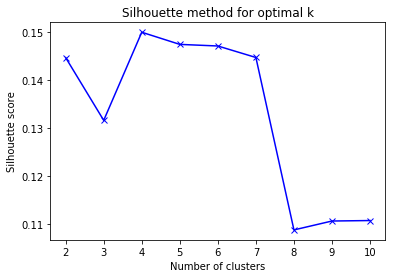

In [23]:

# load the data
df = selected_data

# extract the numerical features and normalize the data
X = df.iloc[:, 1:].values # exclude the first and last columns
X = (X - X.mean(axis=0)) / X.std(axis=0) # normalize the data

# perform KMeans clustering with different values of k
sil_scores = [] # silhouette scores
K = range(2, 11) # minimum and maximum number of clusters to try
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

# plot the silhouette scores
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette method for optimal k')
plt.show()


In [24]:
# load the data
df = selected_data

# extract the numerical features and normalize the data
X = df.iloc[:, 1:-1].values # exclude the first and last columns
X = (X - X.mean(axis=0)) / X.std(axis=0) # normalize the data

# perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

# add a column for the cluster labels to the dataframe
df['cluster'] = labels
df.head()

C:\Users\Jigar_PAtel\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,customerID,SeniorCitizen,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded,cluster
0,7590-VHVEG,0,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,2
1,5575-GNVDE,0,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,1
2,3668-QPYBK,0,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,1
3,7795-CFOCW,0,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,2
4,9237-HQITU,0,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,1


In [31]:
# concatenate the cluster labels as a new column to the original dataframe based on their indexes
result = pd.concat([data_TC, pd.DataFrame({'cluster': labels})], axis=1, join='inner')
final_data=result.iloc[:,list(range(0,21))+[-1]]

In [34]:
final_data.to_csv(r'D:\Portfolio-dashboards\Customer_Churn_project\Customer_churn_Python\final_data.csv', index=False)